In [1]:
%load_ext watermark
%watermark -v -d -p pandas,numpy,matplotlib,seaborn,sklearn

Python implementation: CPython
Python version       : 3.10.0
IPython version      : 7.29.0

pandas    : 1.3.4
numpy     : 1.21.4
matplotlib: 3.5.0
seaborn   : 0.11.2
sklearn   : 1.0.1



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Dataset

We use the **Pima Indians Diabetes Database** from https://data.world/data-society/pima-indians-diabetes-database to create a prediciton model.

In [3]:
dataset = pd.read_csv('./data/original/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The meaning of the columns are:

1. **Pregnancies**: number of times pregnant
2. **Glucose**: plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. **BloodPressure**: diastolic blood pressure (mm Hg)
4. **SkinThickness**: triceps skin fold thickness (mm)
5. **Insulin**: hour serum insulin (mu U/ml)
6. **BMI**: body mass index (weight in kg/(height in m)^2)
7. **DiabetesPedigreeFunction**: utilizes information from a person’s family history to predict how diabetes will affect that individual (see https://www.personal.kent.edu/~mshanker/personal/Zip_files/sar_2000.pdf)
8. **Age**: age in years
9. **Outcome**: class variable (0 or 1)

### Inspect Data

There are no categorial features

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are **no NA values**:

In [5]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Inpecting the **statistics** shows that some features have a value of `0.0` which we consider as missing data and which we replace by it's median:

In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
for feature in ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]:
    dataset[feature].replace(0, dataset[feature].median(), inplace=True)

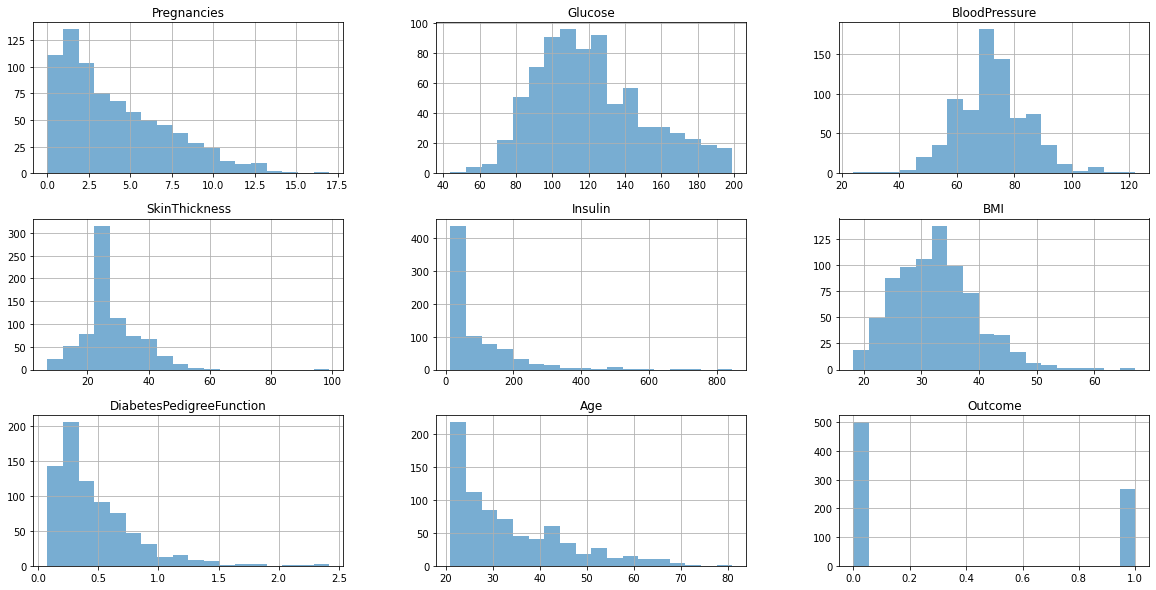

In [8]:
dataset.hist(figsize=(20, 10), bins=18, alpha=0.6);

We replace the column names with lowercase names and save the dataset for model training:

In [9]:
dataset.columns = [col.lower() for col in dataset.columns]

In [10]:
dataset.to_csv('./data/diabetes.csv', index=False) 